<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Proposed-Solution" data-toc-modified-id="Proposed-Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proposed Solution</a></span><ul class="toc-item"><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Algorithms</a></span></li><li><span><a href="#Evaluating-Model-Performance" data-toc-modified-id="Evaluating-Model-Performance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluating Model Performance</a></span></li></ul></li></ul></div>

# Problem Statement

We are aiming to put our skills to the test and ...

# Data Description

The data we're using has been taken from the CSSE/JHU dataset available on Github. Stored locally.

Now, we're going to plot the number of reported cases in Hubei (ground zero) against time.

In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import math
from datetime import timedelta
import requests
import json

In [2]:
# ========================== #
# to help with reading files #
# ========================== #
def data_reader(month):
    # input '01' for January, '02' for February and so on
    # returns a list of dataframes containing all the information pertaining to that month
    filenames = glob.glob("../../covid_data/{}*.csv".format(month))
    timeseries = [s[17:27] for s in filenames]
    list_of_dfs = [pd.read_csv(filename) for filename in filenames]
    for i in range(len(list_of_dfs)):
        list_of_dfs[i]['time'] = pd.to_datetime(timeseries[i])
    return list_of_dfs

# =========================================================== #
# Plotting confirmed cases against no. of days since outbreak #
# =========================================================== #
def provincePlot(province, data):
    df = pd.DataFrame(columns=['Confirmed', 'Deaths', 'Recovered', 'time'])
    df = pd.concat([df, data[data['Province/State'] == province].loc[:,['Confirmed', 'Deaths','Recovered','time']]], ignore_index=True)
    df = df.sort_values('time').reset_index()
    plt.figure(figsize=(15, 6))
    plt.xlabel('Timestamp', fontsize=14)
    plt.ylabel('No. of confirmed cases', fontsize=14)
    plt.plot(
        df['Confirmed'],
        marker = 'x',
        linestyle=''
    )

def countryPlot(country, data):
    df = pd.DataFrame(columns=['Confirmed', 'Deaths', 'Recovered', 'time'])
    df = pd.concat([df, data[data['Country/Region'] == country].loc[:,['Confirmed', 'Deaths','Recovered','time']]], ignore_index=True)
    df = df.sort_values('time').reset_index()
    plt.figure(figsize=(15, 6))
    plt.xlabel('Timestamp', fontsize=14)
    plt.ylabel('No. of confirmed cases', fontsize=14)
    plt.plot(
        df['Confirmed'],
        marker = 'x',
        linestyle=''
    )

In [4]:
# ============= #
# Cost Function #
# ============= #
# def computeCost(theta):
#     # L (ceiling of our logistic function) = 67786
#     L = 67786
#     m = data.shape[0] # number of training examples
#     n = 1 # we have only one feature, days since the beginning of the outbreak
#     cost = 0
#     for row in range(m):
#         hyp = 0
#         hyp += (L/(1 + theta[0] * (math.e ** (theta[1] * data.values[row][9].days))))
#         cost_temp = (hyp - data.values[row][0])**2
#         cost += cost_temp
#     cost *= 0.5
#     cost /= m
#     return round(cost, 2)

# ================ #
# Gradient Descent #
# ================ #
def gradientDescent(theta, alpha, iterations):
    m = data.shape[0] # number of training examples
    n = 1
    L = 67786
    for i in range(iterations):
        total0 = 0
        total1 = 0
        for row in range(m):
            hyp = 0
            hyp += (L/(1 + theta[0] * (math.e ** (theta[1] * data.values[row][-1].days))))
            load = hyp - data.values[row][2]
            total0 += load * data.values[row][2]
            total1 += load * data.values[row][2]
        temp0 = theta[0] - ((alpha * total0)/m)
        temp1 = theta[1] - ((alpha * total1)/m)
        theta = [round(temp0, 4), round(temp1, 4)]
    return theta

In [2]:
getUrl = "https://api.covid19api.com/all"
response = requests.get(getUrl)
print(getUrl)
response.raise_for_status()
# loading the json data
data = json.loads(response.text)

https://api.covid19api.com/all


In [52]:
df = pd.DataFrame(data)
df = df[df['Status'] == 'confirmed']
df = df[df['Province'] == 'Hubei']
df = df.reset_index()

In [32]:
df.head(5)

,index,Cases,Country,Date,Lat,Lon,Province,Status
0,4280,1,China,2020-01-22T00:00:00Z,37.5777,112.292,Shanxi,confirmed
1,4282,5,China,2020-01-22T00:00:00Z,33.8820,113.614,Henan,confirmed
2,4283,10,China,2020-01-22T00:00:00Z,29.1832,120.093,Zhejiang,confirmed
3,4285,1,China,2020-01-22T00:00:00Z,37.2692,106.165,Ningxia,confirmed
4,4286,2,China,2020-01-22T00:00:00Z,23.8298,108.788,Guangxi,confirmed


In [83]:
target = list(df[df['Country'] == 'China']['Cases'])
len(target)

66

In [113]:
df.Date = pd.to_datetime(df[df['Country'] == 'China'].Date)
df['Days'] = df.Date - min(df.Date)
# features = list()
# for i in range(df.shape[0]):
#     features.append(df.iloc[0]['Days'].days)

4

In [201]:
features = list()
for i in range(df.shape[0]):
    features.append(df.iloc[i]['Days'].days)
len(features)
df['time'] = features
import os, csv
os.chdir('/Users/mehuljangir/Downloads')
df.to_csv().split('\n')
with open('covid_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for row in df.to_csv().split('\n'):
        writer.writerow(row.split(',')[0:])


In [202]:
df
















































































































3

,index,Cases,Country,Date,Lat,Lon,Province,Status,Days,time
0,4321,444,China,2020-01-22 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,0 days,0
1,4420,444,China,2020-01-23 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,1 days,1
2,4519,549,China,2020-01-24 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,2 days,2
3,4618,761,China,2020-01-25 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,3 days,3
4,4717,1058,China,2020-01-26 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,4 days,4
5,4817,1423,China,2020-01-27 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,5 days,5
6,4917,3554,China,2020-01-28 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,6 days,6
7,5016,3554,China,2020-01-29 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,7 days,7
8,5116,4903,China,2020-01-30 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,8 days,8
9,5215,5806,China,2020-01-31 00:00:00+00:00,30.9756,112.271,Hubei,confirmed,9 days,9


In [101]:
from scipy.optimize import curve_fit
import numpy as np

In [102]:
from sklearn.kernel_ridge import KernelRidge

In [103]:
model = KernelRidge(alpha = 1.0)

In [194]:
target = list(df['Cases'])

df.Date = pd.to_datetime(df.Date)
df['Days'] = df.Date - min(df.Date)
features = list()
for i in range(df.shape[0]):
    features.append(df.iloc[i]['Days'].days)
    
features = np.array([features])
target = np.array([target])

model.fit(features, target)
features, target

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
         48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
         64, 65]]),
 array([[  444,   444,   549,   761,  1058,  1423,  3554,  3554,  4903,
          5806,  7153, 11177, 13522, 16678, 19665, 22112, 24953, 27100,
         29631, 31728, 33366, 33366, 48206, 54406, 56249, 58182, 59989,
         61682, 62031, 62442, 62662, 64084, 64084, 64287, 64786, 65187,
         65596, 65914, 66337, 66907, 67103, 67217, 67332, 67466, 67592,
         67666, 67707, 67743, 67760, 67773, 67781, 67786, 67790, 67794,
         67798, 67799, 67800, 67800, 67800, 67800, 67800, 67800, 67801,
         67801, 67801, 67801]]))

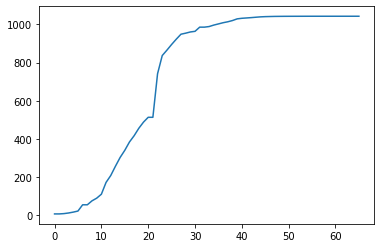

In [175]:
X_plot = np.linspace(0, 1, 66)[:, None]
# model.predict(np.transpose(X_plot))
out = model.predict(np.transpose(X_plot))
plt.plot(pd.Series(np.reshape(out, out.size)))

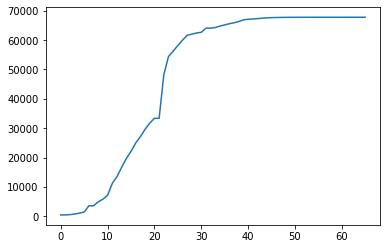

In [176]:
plt.plot(pd.Series(np.reshape(target, target.size)))

In [125]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
np.shape(y)

(10,)

In [94]:
def func(x, a, b):
    return 67801/(1 + a * (math.e ** (b * x)))

In [93]:
max(df.Cases)

67801

In [109]:
target = list(df[df['Country'] == 'China']['Cases'])

df.Date = pd.to_datetime(df[df['Country'] == 'China'].Date)
df['Days'] = df.Date - min(df.Date)
features = list()
for i in range(df.shape[0]):
    features.append(df.iloc[0]['Days'].days)
features = np.array([features])
target = np.transpose(np.array([target]))
print(np.shape(target))
print(np.shape(features))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(66, 1)
(1, 66)


In [56]:
)january = data_reader('01')
february = data_reader('02')
march = data_reader('03')
data = january[0]
for df in january[1:] + february + march:
    data = pd.concat([data, df])

SyntaxError: invalid syntax (<ipython-input-56-1e232a051f48>, line 1)

In [94]:
data['days'] = data.time - min(data.time)
data = data[data['Province/State'] == 'Hubei']

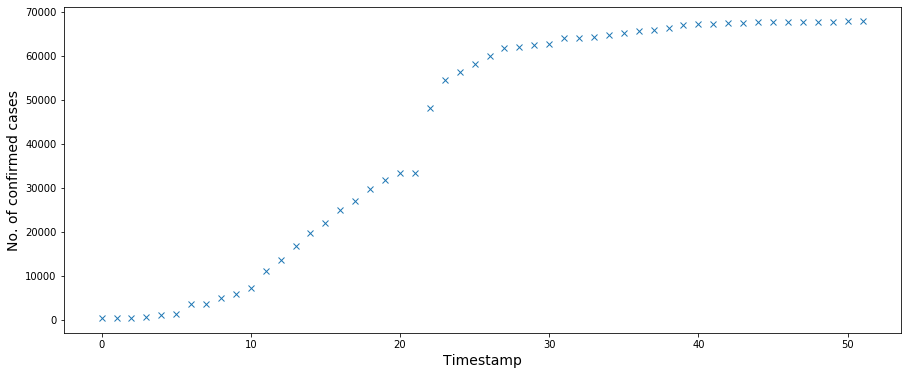

In [74]:
provincePlot('Hubei', data)

In [75]:
m = data.shape[0]
print("no. of training examples| {}".format(m))

no. of training examples| 52


In [76]:
alpha = 0.01
iterations = 1500

In [176]:
theta = [0, 0]
features = list()
for i in data.days:
    features.append(i.days)
target = list(data.Confirmed)
theta = gradientDescent(theta, alpha, iterations)

In [177]:
theta

[-5523631601.0769, -5523631601.0769]

In [87]:
theta

[-5523631601.0769, -5523631601.0769]

In [186]:
features = list()
for i in data.days:
    features.append(i.days)
output = list()
for f in features:
     val = 67786/(1 + 0.1 * (math.e ** (-.002 * f)))
     output.append(val)
output[:5]

[61623.63636363636,
 61634.831497770116,
 61646.00832019223,
 61657.166853495466,
 61668.30712027169]

# Proposed Solution

## Algorithms

## Evaluating Model Performance